<a href="https://colab.research.google.com/github/cipB14/Questify/blob/patch1/ML_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC / LINEAR REGRESSION

[0.14285714 0.28571429 0.42857143 0.57142857 0.71428571 0.85714286
 1.         1.14285714 1.28571429]
[0.09033582 0.21803502 0.43911192 0.6873201  0.86056701 0.94544233
 0.97986158 0.99273337 0.99739978]
Mean Squared Error (Linear Regression): 0.26530612244897933
Accuracy (Logistic Regression): 0.5


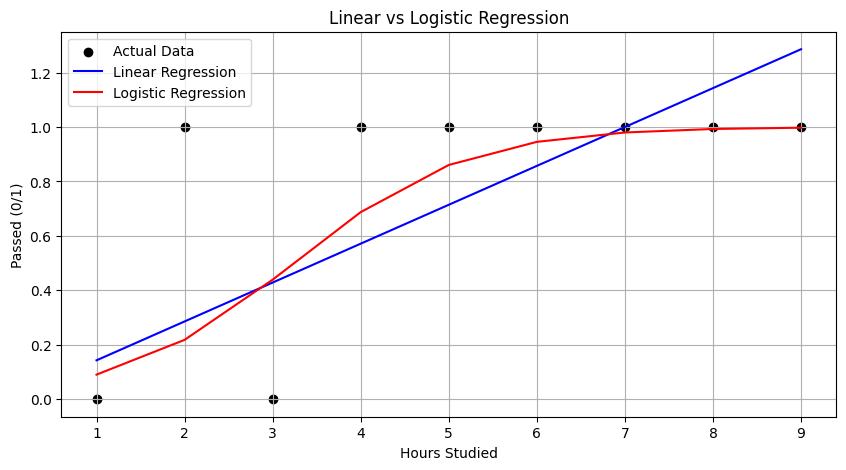

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# 1. Data
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Passed': [0, 1, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
X = df[['Hours']]
y = df['Passed']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_linear = model1.predict(X)
print(y_pred_linear) # Predicted values

# 4. Logistic Regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred_logistic = model2.predict_proba(X)[:,1]
print(y_pred_logistic) # Probability of class 1

# 5. Metrics
mse = mean_squared_error(y_test, model1.predict(X_test))
accuracy = accuracy_score(y_test, model2.predict(X_test))

print("Mean Squared Error (Linear Regression):", mse)
print("Accuracy (Logistic Regression):", accuracy)

# 6. Visualization
plt.figure(figsize=(10, 5))

# Scatter original points
plt.scatter(X, y, color='black', label='Actual Data')

# Linear regression line (reshape X to a 1D array for plotting)
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression')

# Logistic regression curve
plt.plot(X, y_pred_logistic, color='red', label='Logistic Regression')

plt.xlabel('Hours Studied')
plt.ylabel('Passed (0/1)')
plt.title('Linear vs Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
MLP WITH BACK PROPOGATION

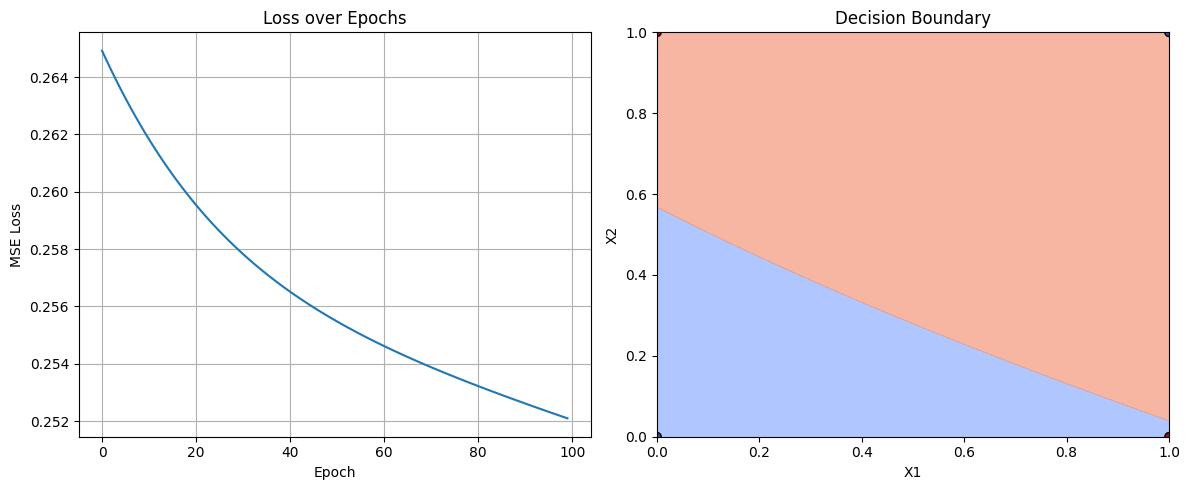

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 1. XOR Inputs and Outputs
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# 2. Init Weights
np.random.seed(1)
W1 = np.random.randn(2, 4)
W2 = np.random.randn(4, 1)

# 3. Activation functions
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

losses = []

# 4. Train Loop
for epoch in range(100):
    Z1 = np.dot(X, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    loss = np.mean((y - A2) ** 2)
    losses.append(loss)

    error = y - A2
    dZ2 = error * sigmoid_deriv(A2)
    dW2 = np.dot(A1.T, dZ2)

    dZ1 = np.dot(dZ2, W2.T) * sigmoid_deriv(A1)
    dW1 = np.dot(X.T, dZ1)

    W1 += 0.1 * dW1
    W2 += 0.1 * dW2

# 5. Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

# 6. Decision Boundary Plot
def predict(x):
    a1 = sigmoid(np.dot(x, W1))
    a2 = sigmoid(np.dot(a1, W2))
    return a2

# Create grid
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid)
Z = Z.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap="coolwarm")
plt.title("Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()


DECISION TREE

Accuracy: 0.5


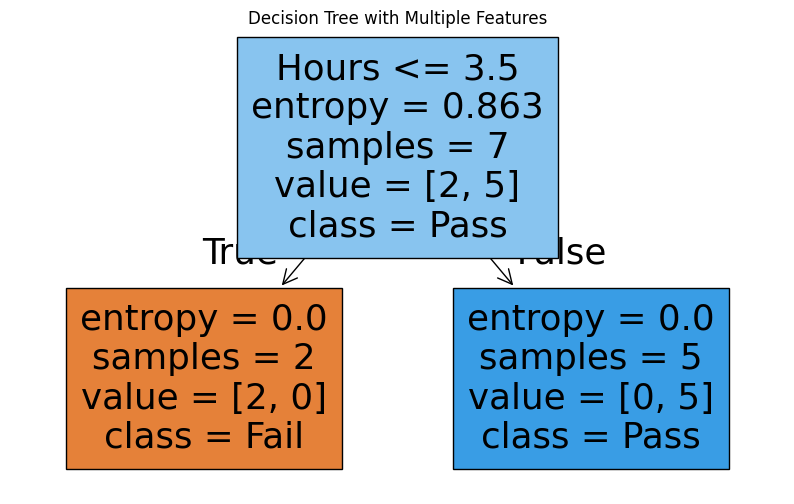

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Sample data with more features
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Age': [18, 19, 20, 21, 22, 23, 24, 25, 26],
    'Salary': [1000, 1200, 1100, 1400, 1500, 1600, 1700, 1800, 1900],
    'Passed': [0, 1, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Features and target
X = df[['Hours', 'Age', 'Salary']]
y = df['Passed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree
model = DecisionTreeClassifier()
#for ID3 model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=['Hours', 'Age', 'Salary'], class_names=['Fail', 'Pass'], filled=True)
plt.title("Decision Tree with Multiple Features")
plt.show()


LDA and PDA

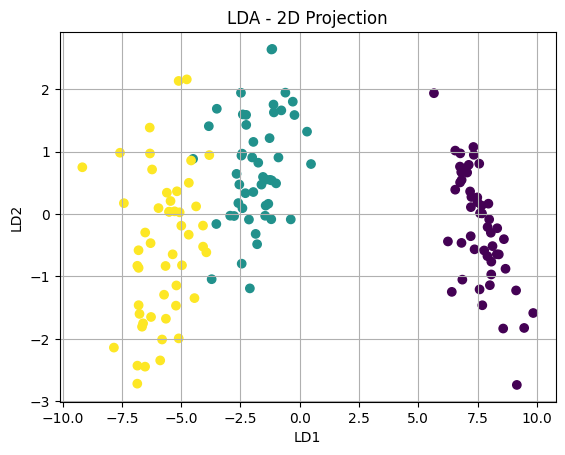

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load sample dataset
iris = load_iris()
X = iris.data
y = iris.target

# 1. Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# 2. Plot LDA result
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title("LDA - 2D Projection")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()


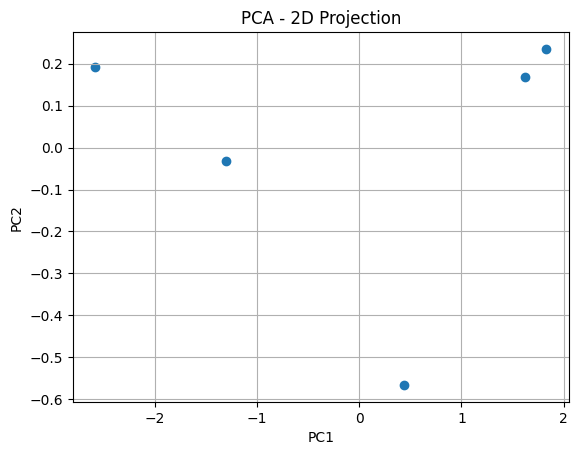

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample data
data = {
    'Math': [85, 89, 72, 65, 90],
    'Science': [78, 94, 72, 66, 92],
    'English': [82, 88, 70, 60, 85]
}
df = pd.DataFrame(data)

# 1. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 2. PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Plot PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA - 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
